<a href="https://colab.research.google.com/github/asandeep1/ECE-8803-HW1/blob/main/ECE_8803_HW1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 Part b)

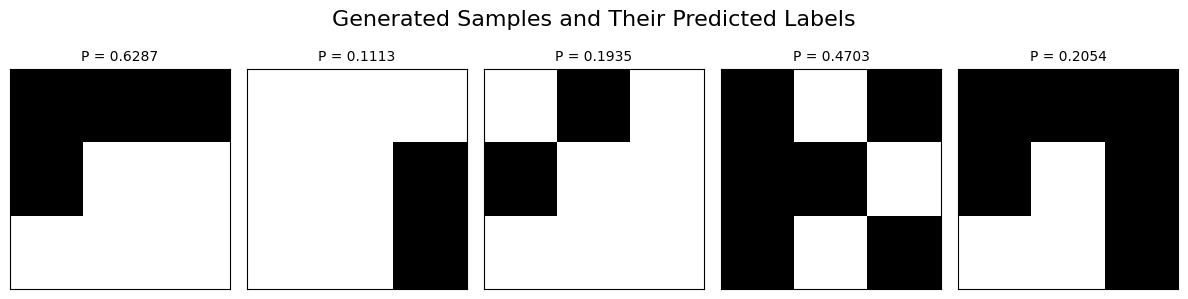

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def plot_image_with_label(image_flat, label, ax):
    image_grid = image_flat.reshape(3, 3)
    ax.imshow(image_grid, cmap='gray', vmin=0, vmax=1)
    ax.set_title(f'P = {label:.4f}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# 0 means black, 1 means white
def generate_img(sampleSize):
    imgs = []
    labels = []
    seen_imgs = set()
    total_blk_pixels = 2304

    while len(imgs) < sampleSize:
        img_flat = np.random.randint(0, 2, 9)
        img_tup = tuple(img_flat)

        if img_tup not in seen_imgs:
            num_blk_pxls = 9 - np.sum(img_flat)
            prob_img = num_blk_pxls/total_blk_pixels

            imgs.append(img_flat)
            labels.append(prob_img)
            seen_imgs.add(img_tup)
    return np.array(imgs), np.array(labels)

def buildMLP(xTrain, yTrain):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(9,)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mse')
    model.fit(xTrain, yTrain, epochs=50, batch_size=16, verbose=0)
    return model

def gen_Samples(model, sampleSize, num_proposals=10000):
    samples = []
    while len(samples) < sampleSize:
        gen_imgs = np.random.randint(0, 2, (num_proposals, 9))
        predict_labels = model.predict(gen_imgs, verbose=0).flatten()

        max_prob = np.max(predict_labels)
        norm_probs = predict_labels / max_prob if max_prob > 0 else predict_labels

        # rejection sampling
        for i in range(num_proposals):
            if np.random.rand() < norm_probs[i] and len(samples) < sampleSize:
                samples.append(gen_imgs[i])
    return np.array(samples)

# Create training data
x_train, x_labels = generate_img(200)

# Train the model
myMLP = buildMLP(x_train, x_labels)

# Generate new samples
generated_imgs = gen_Samples(myMLP, 5)

# Visualization of samples
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Generated Samples and Their Predicted Labels', fontsize=16)

for i in range(5):
    plot_image_with_label(generated_imgs[i], labels[i], axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.tight_layout()
plt.show()

Problem 1 Part c)

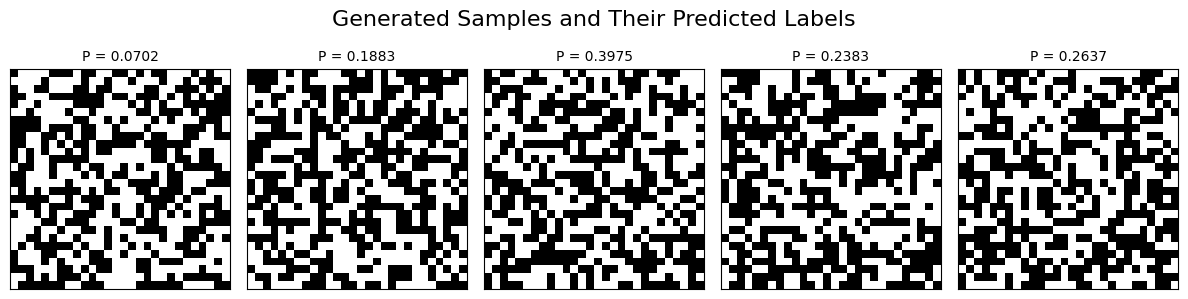

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def plot_image_with_label(image_flat, label, ax):
    image_grid = image_flat.reshape(28, 28)
    ax.imshow(image_grid, cmap='gray', vmin=0, vmax=1)
    ax.set_title(f'P = {label:.4f}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# 0 means black, 1 means white
# Generating image with size 28x28 instead of 3x3 would mean that there are

numPxlsPerImg = 28*28

def generate_img(sampleSize):
    imgs = []
    labels = []
    seen_imgs = set()
    sampleSpace = 2**numPxlsPerImg
    total_blk_pixels = numPxlsPerImg*2**(numPxlsPerImg-1)

    while len(imgs) < sampleSize:
        img_flat = np.random.randint(0, 2, numPxlsPerImg)
        img_tup = tuple(img_flat)

        if img_tup not in seen_imgs:
            num_blk_pxls = numPxlsPerImg - np.sum(img_flat)
            prob_img = num_blk_pxls/total_blk_pixels

            imgs.append(img_flat)
            labels.append(prob_img)
            seen_imgs.add(img_tup)
    return np.array(imgs), np.array(labels)

def buildMLP(xTrain, yTrain):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(numPxlsPerImg,)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mse')
    model.fit(xTrain, yTrain, epochs=50, batch_size=16, verbose=0)
    return model

def gen_Samples(model, sampleSize, num_proposals=10000):
    samples = []
    labels = []
    while len(samples) < sampleSize:
        gen_imgs = np.random.randint(0, 2, (num_proposals, numPxlsPerImg))
        predict_labels = model.predict(gen_imgs, verbose=0).flatten()

        max_prob = np.max(predict_labels)
        norm_probs = predict_labels / max_prob if max_prob > 0 else predict_labels

        # rejection sampling
        for i in range(num_proposals):
            if np.random.rand() < norm_probs[i] and len(samples) < sampleSize:
                samples.append(gen_imgs[i])
                labels.append(norm_probs[i])
    return np.array(samples), labels

# Create training data
x_train, x_labels = generate_img(200)

# Train the model
myMLP = buildMLP(x_train, x_labels)

# Generate new samples
generated_imgs, labels = gen_Samples(myMLP, 5)

# Visualization of samples
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Generated Samples and Their Predicted Labels', fontsize=16)

for i in range(5):
    plot_image_with_label(generated_imgs[i], labels[i], axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.tight_layout()
plt.show()